<h2>Query 5.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_data = pd.read_csv('./week2.csv', index_col = 0)
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.set_index('Date', inplace = True)
stock_data.head()

,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,
2017-05-16,EQ,563.90,564.80,567.70,559.0,561.6,562.60,562.26,495571,2.786409e+08,8172,203735,41.11,5,2017,-0.230537,Slight or No change
2017-05-17,EQ,562.60,563.00,569.90,558.0,564.7,564.25,563.94,831318,4.688176e+08,13860,253851,30.54,5,2017,0.293281,Slight or No change
2017-05-18,EQ,564.25,559.80,563.00,551.0,553.5,552.15,555.33,1050920,5.836120e+08,27124,615645,58.58,5,2017,-2.144440,Negative
2017-05-19,EQ,552.15,560.95,567.00,551.4,553.8,555.45,558.44,1292735,7.219101e+08,39632,569809,44.08,5,2017,0.597664,Slight positive
2017-05-22,EQ,555.45,557.50,559.95,542.6,545.5,544.85,548.78,676006,3.709780e+08,13070,285523,42.24,5,2017,-1.908363,Negative


In [3]:
stock_data.Day_Perc_Change = stock_data['Close Price'].pct_change(fill_method='ffill').fillna(0)
stock_data.Day_Perc_Change.head()

Date
2017-05-16    0.000000
2017-05-17    0.002933
2017-05-18   -0.021444
2017-05-19    0.005977
2017-05-22   -0.019084
Name: Day_Perc_Change, dtype: float64

<h4>( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [4]:
# Avoiding first record. Because it's NaN value
daily_mean = stock_data[1:].Day_Perc_Change.mean()
round(daily_mean, 9)

0.000455985

In [5]:
daily_std = stock_data[1:].Day_Perc_Change.std()
round(daily_std, 4)

0.0163

In [6]:
annual_mean = daily_mean*252
round(annual_mean, 4)

0.1149

In [7]:
annual_std = daily_std*pd.np.sqrt(252)
round(annual_std, 4)

0.259

<h2>Query 5.2

In [8]:
asianpaint_stock = pd.read_csv("./ASIANPAINT.csv")
bajfinance_stock = pd.read_csv("./BAJFINANCE.csv")
hdfc_stock = pd.read_csv("./HDFCBANK.csv")
hindunilvr_stock = pd.read_csv("./HINDUNILVR.csv")
titan_stock = pd.read_csv("./TITAN.csv")

In [9]:
asianpaint_stock = asianpaint_stock[asianpaint_stock.Series == 'EQ'].reset_index(drop=True)
bajfinance_stock = bajfinance_stock[bajfinance_stock.Series == 'EQ'].reset_index(drop=True)
hdfc_stock = hdfc_stock[hdfc_stock.Series == 'EQ'].reset_index(drop=True)
hindunilvr_stock = hindunilvr_stock[hindunilvr_stock.Series == 'EQ'].reset_index(drop=True)
titan_stock = titan_stock[titan_stock.Series == 'EQ'].reset_index(drop=True)

In [10]:
close_price_stock = pd.DataFrame({asianpaint_stock.Symbol[0] : asianpaint_stock["Close Price"],
                                  bajfinance_stock.Symbol[0] : bajfinance_stock["Close Price"],
                                  hdfc_stock.Symbol[0] : hdfc_stock["Close Price"],
                                  hindunilvr_stock.Symbol[0] : hindunilvr_stock["Close Price"],
                                  titan_stock.Symbol[0] : titan_stock["Close Price"]})
close_price_stock.tail()

,ASIANPAINT,BAJFINANCE,HDFCBANK,HINDUNILVR,TITAN
489,1387.80,3017.05,2322.35,1697.50,1086.50
490,1385.70,2921.30,2307.25,1688.70,1088.70
491,1354.20,2971.35,2290.90,1703.75,1104.45
492,1341.05,2922.85,2296.50,1687.45,1132.10
493,1332.50,2931.85,2287.20,1702.00,1144.70


In [11]:
close_price_stock.shape

(494, 5)

In [12]:
daily_returns = close_price_stock.pct_change(fill_method='ffill').dropna()
# daily_returns.head()

In [13]:
daily_mean_returns = daily_returns.mean()
daily_mean_returns

ASIANPAINT    0.000389
BAJFINANCE    0.001803
HDFCBANK      0.000830
HINDUNILVR    0.001188
TITAN         0.001951
dtype: float64

In [14]:
weights = pd.np.array([0.2]*5)
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [15]:
annual_returns = (daily_mean_returns * weights).sum() * 252
round(annual_returns,4)

0.3105

In [16]:
covariance = daily_returns.cov()
covariance

,ASIANPAINT,BAJFINANCE,HDFCBANK,HINDUNILVR,TITAN
ASIANPAINT,0.000174,0.000068,0.000036,0.000048,0.000057
BAJFINANCE,0.000068,0.000409,0.000055,0.000047,0.000063
HDFCBANK,0.000036,0.000055,0.000090,0.000028,0.000031
HINDUNILVR,0.000048,0.000047,0.000028,0.000149,0.000056
TITAN,0.000057,0.000063,0.000031,0.000056,0.000419


In [17]:
weight = 0.2 # weights[0]
portfolio_std_dev = 0
for i in range(len(covariance)):
    for j in range(len(covariance)):
        portfolio_std_dev += weight * weight * covariance.iloc[i,j]

portfolio_std_dev = pd.np.sqrt(portfolio_std_dev)
        
annual_std = portfolio_std_dev*pd.np.sqrt(252)
round(annual_std, 4)

# Alternative Generalize method
# annual_std = pd.np.sqrt(pd.np.dot(weights,pd.np.dot(weights, covariance))) * pd.np.sqrt(252)
# round(annual_std, 4)

0.1495

<h2>Query 5.3

In [18]:
# To get the same random numbers every time for reproducibility.
pd.np.random.seed(42)
# Number of Different Portfolios considered
portfolio_num = 8000
# To save all weightage of all portfolios
all_weights = pd.np.zeros((portfolio_num, len(covariance)))
# Array for storing Returns, Volatility and Sharpe Ratio for specific Portfolio
ret_vol_sharpe = pd.np.zeros((portfolio_num, 3))

In [19]:
for i in range(portfolio_num):
    # Random Weights for 5 different assets in portfolio
    weights = pd.np.random.random(5)
    weights /= weights.sum()
    # Save weights
    all_weights[i,:] = weights
    
    # calculate Portfolio Returns
    ret_vol_sharpe[i,0] = (daily_mean_returns * weights).sum() * 252
    # calculate Portfolio Volatility
    ret_vol_sharpe[i,1] = pd.np.sqrt(pd.np.dot(weights,pd.np.dot(weights, covariance))) * pd.np.sqrt(252)
    # calculate Sharpe Ratio
    ret_vol_sharpe[i,2] = ret_vol_sharpe[i,0] / ret_vol_sharpe[i,1]

ret_vol_sharpe = pd.DataFrame(ret_vol_sharpe, columns=['Returns', 'Volatility', 'Sharpe_Ratio'])

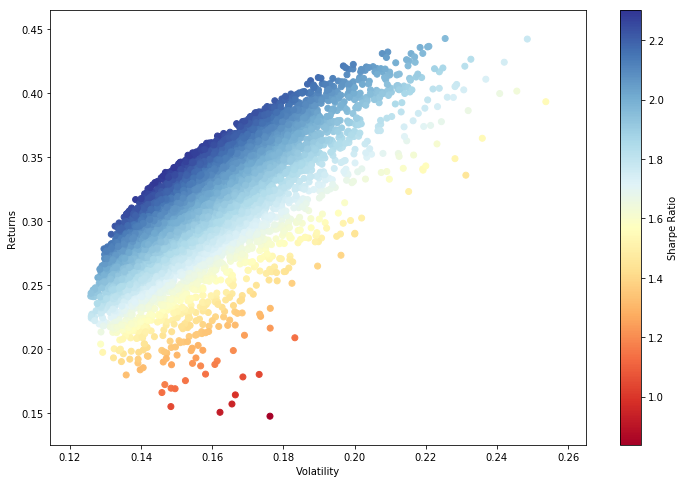

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(ret_vol_sharpe.Volatility, ret_vol_sharpe.Returns, c=ret_vol_sharpe.Sharpe_Ratio, cmap='RdYlBu')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

<h2>Query 5.4

In [21]:
high_sharpe_ratio_idx = ret_vol_sharpe.Sharpe_Ratio.idxmax()
high_sharpe_ratio_returns = ret_vol_sharpe.Returns[high_sharpe_ratio_idx]
high_sharpe_ratio_volatility = ret_vol_sharpe.Volatility[high_sharpe_ratio_idx]

print(f"Max Sharpe Ratio : {ret_vol_sharpe.Sharpe_Ratio.max()}")
print(f"It's Location at : {high_sharpe_ratio_idx}")
print("Weights for Best Portfolio : ", all_weights[high_sharpe_ratio_idx,:])

Max Sharpe Ratio : 2.301825228380571
It's Location at : 831
Weights for Best Portfolio :  [0.00440529 0.18454587 0.29072094 0.3270908  0.19323711]


In [22]:
low_volatility = ret_vol_sharpe.Volatility.min()
low_volatility_idx = ret_vol_sharpe.Volatility.idxmin()
low_volatility_returns = ret_vol_sharpe.Returns[low_volatility_idx]

print(f"Low Volatility : {low_volatility}")
print(f"Low Volatility Location : {low_volatility_idx}")
print(f"Weights for Low Volatility : {all_weights[low_volatility_idx,:]}")

Low Volatility : 0.12583883177418315
Low Volatility Location : 6583
Weights for Low Volatility : [0.16604141 0.04267851 0.48017087 0.24798249 0.06312672]


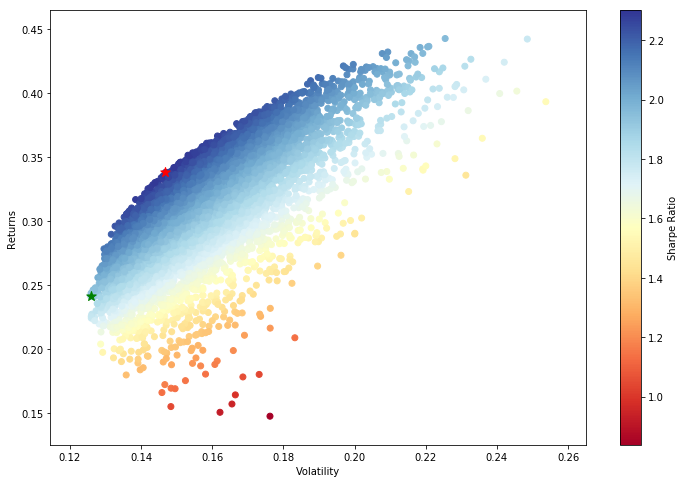

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(ret_vol_sharpe.Volatility, ret_vol_sharpe.Returns, c=ret_vol_sharpe.Sharpe_Ratio, cmap='RdYlBu')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Volatility')
plt.ylabel('Returns')
# Best Portfolio
plt.scatter(high_sharpe_ratio_volatility, high_sharpe_ratio_returns, c='r', s=100, marker='*')
# Low Volatility : Low risk
plt.scatter(low_volatility, low_volatility_returns, c='g', s=100, marker='*')
plt.show()